In [1]:
import sys
sys.path.insert(0, '..')
from motif_learning import MotifLearner
import mat73
import numpy as np
import matplotlib.pyplot as plt

### Loading behavioural data (locomotion) of roundworm C. elegans

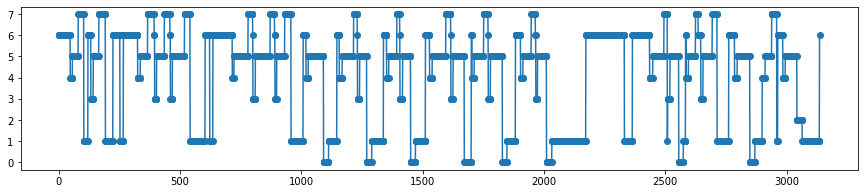

In [2]:
class Database:
    def __init__(self):
        data_set_no = 0
        data_dict = mat73.loadmat('NoStim_Data.mat')
        data  = data_dict['NoStim_Data']

        deltaFOverF_bc = data['deltaFOverF_bc'][data_set_no]
        derivatives = data['derivs'][data_set_no]
        NeuronNames = data['NeuronNames'][data_set_no]
        fps = data['fps'][data_set_no]
        States = data['States'][data_set_no]


        self.states = np.sum([n*States[s] for n, s in enumerate(States)], axis = 0).astype(int) # making a single states array in which each number corresponds to a behaviour
        self.state_names = [*States.keys()]
        self.neuron_traces = np.array(deltaFOverF_bc).T
        self.derivative_traces = derivatives['traces'].T
        self.neuron_names = np.array(NeuronNames, dtype=object)
        self.fps = fps

data = Database()
dataset = data.states
plt.figure(figsize=(15,3))
plt.plot(dataset,linestyle='-', marker='o')
m = len(dataset)

### Pre-processing

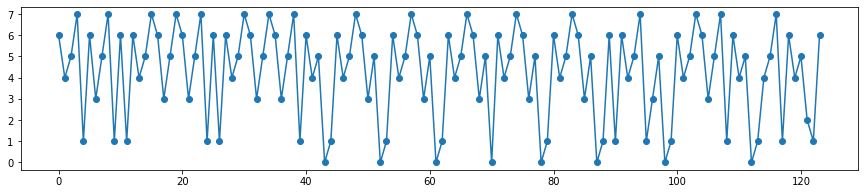

In [3]:
serialised = [-1]
for i in dataset:
    if serialised[-1] != i:
        serialised.append(i)
serialised.remove(-1)
dataset=serialised
plt.figure(figsize=(15,3))
plt.plot(dataset,linestyle='-', marker='o')

## Motif learning

In [4]:
motifl = MotifLearner(sim_thresh=1, freq_thresh=3, l_motif_range=[4,12])
motifl.fit(dataset)
motifl.get_motifs()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[[6, 4, 5, 7],
 [5, 7, 1, 6],
 [1, 6, 4, 5],
 [5, 7, 6, 3, 5],
 [1, 6, 4, 5, 7],
 [6, 4, 5, 7, 6, 3, 5],
 [1, 6, 4, 5, 7, 6, 3, 5],
 [3, 5, 0, 1, 6, 4, 5, 7, 6, 3, 5]]

## Visualising motifs with interactive plot

In [5]:
motifl.matrix_plot()

interactive(children=(IntSlider(value=8, description='l_motif', max=12, min=4), Output()), _dom_classes=('widg…

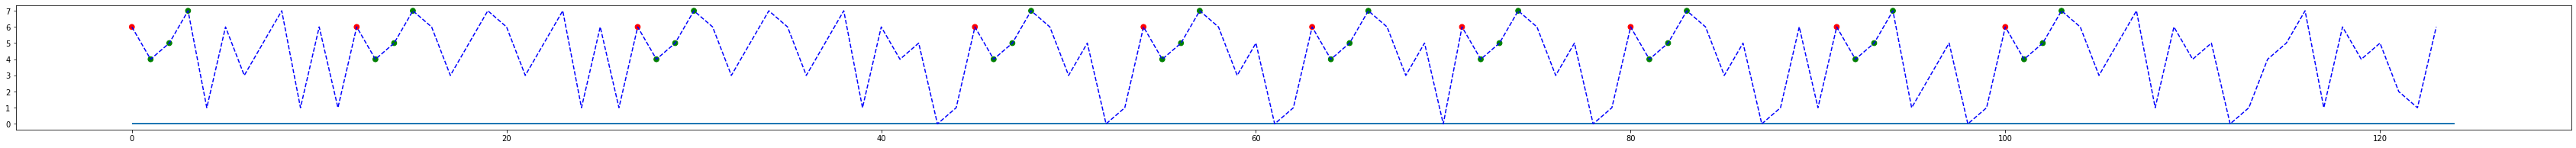

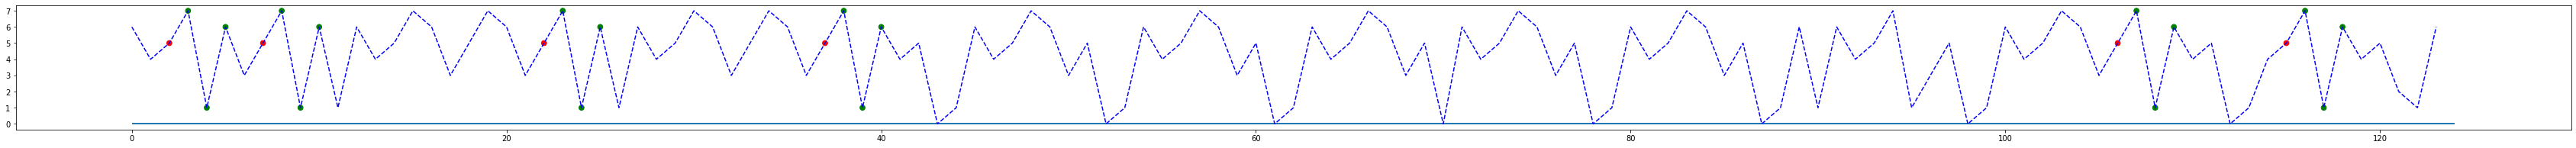

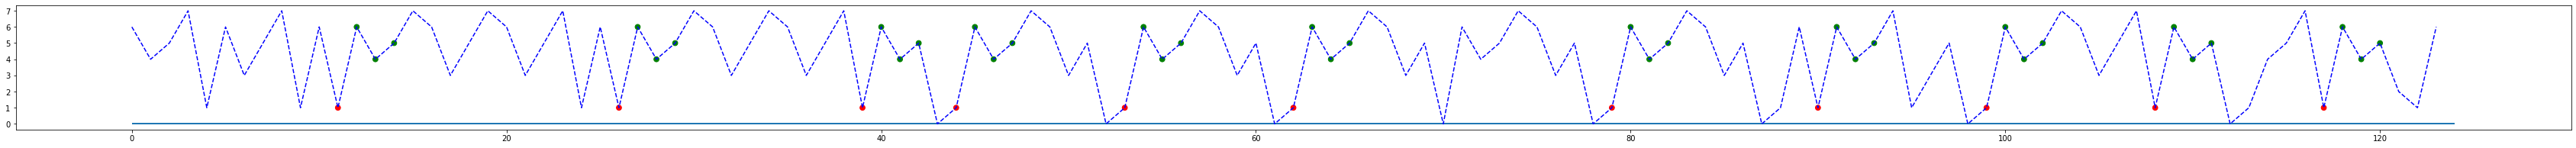

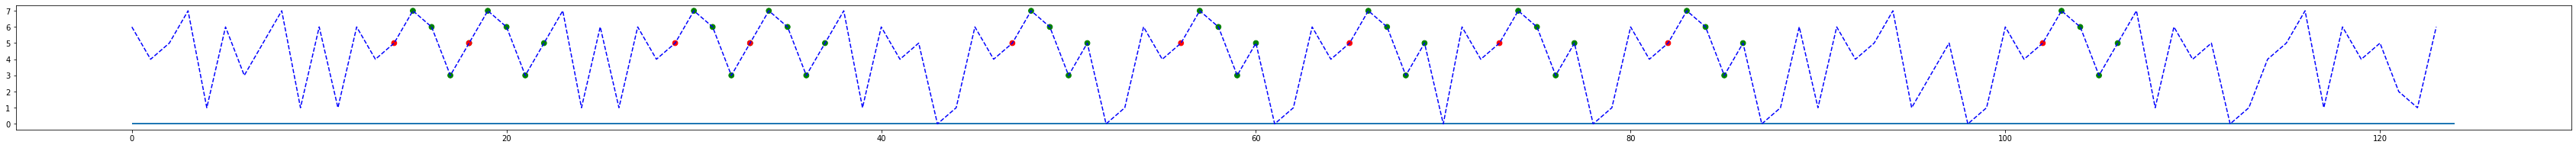

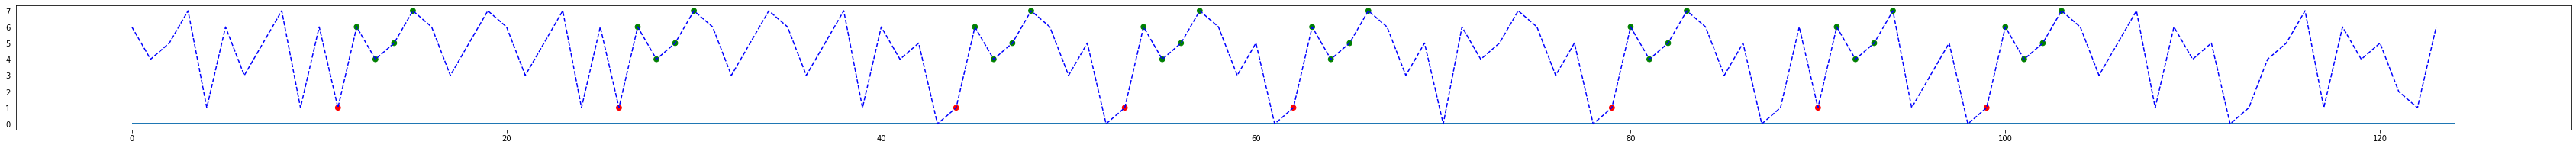

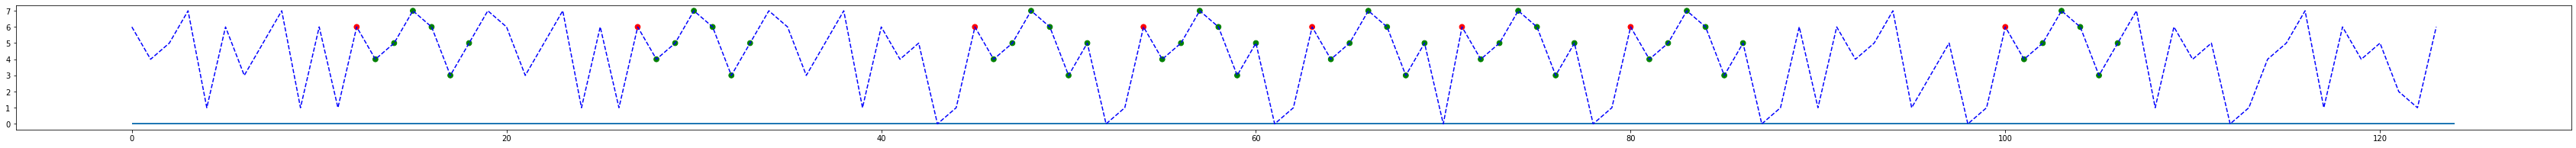

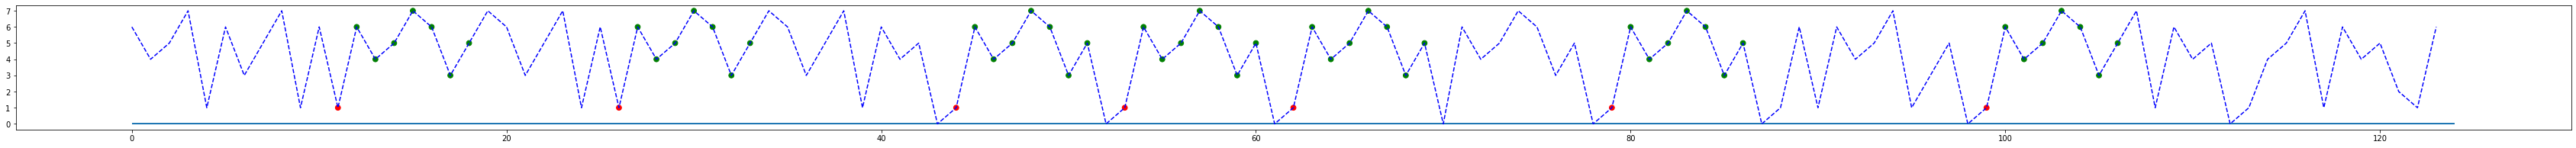

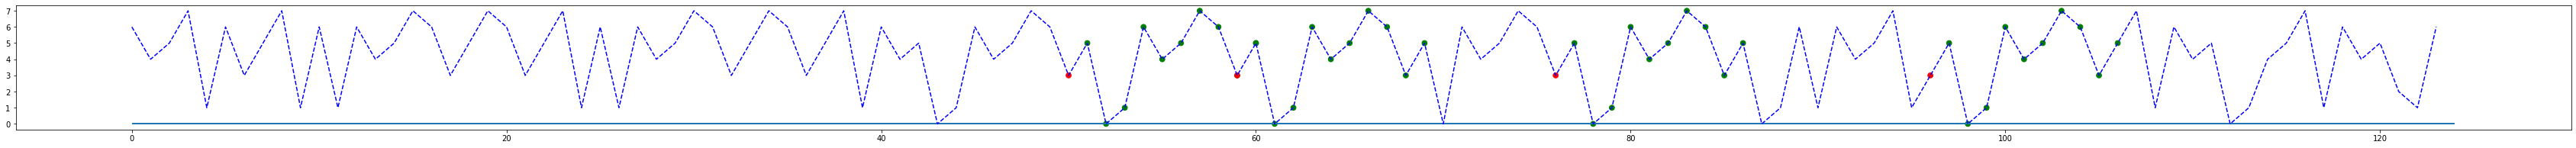

In [6]:
motifl.plot_motif_appearances(pruned=False)

## Analysis of how the motifs compose, and pruning

In [7]:
motif_comp_mtx, pruned_motif_list = motifl.motif_composition_analysis()

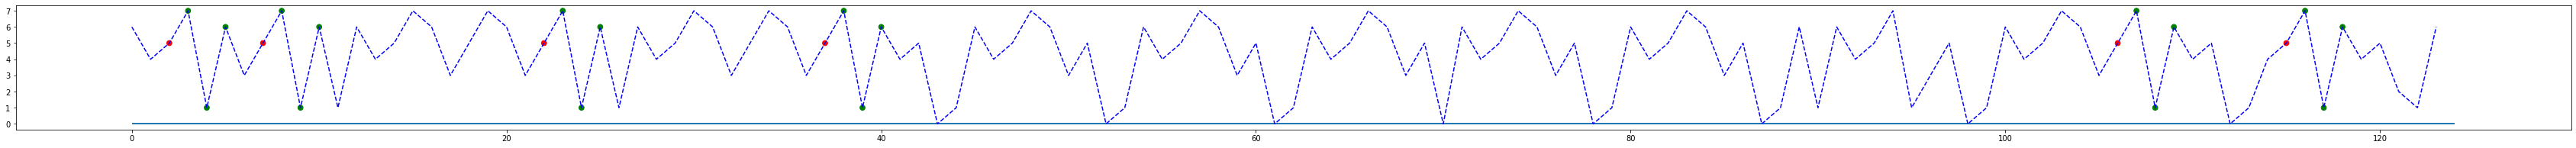

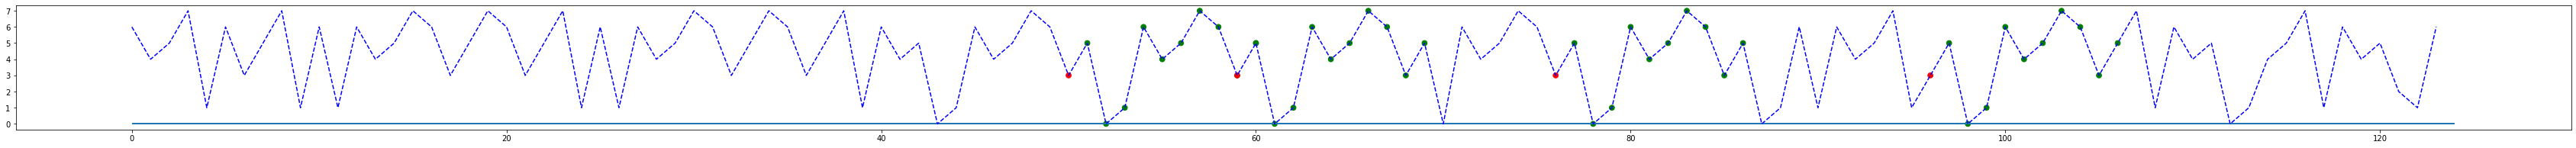

In [8]:
motifl.plot_motif_appearances(pruned=True)

In [9]:
motifl.motif_list

[[6, 4, 5, 7],
 [5, 7, 1, 6],
 [1, 6, 4, 5],
 [5, 7, 6, 3, 5],
 [1, 6, 4, 5, 7],
 [6, 4, 5, 7, 6, 3, 5],
 [1, 6, 4, 5, 7, 6, 3, 5],
 [3, 5, 0, 1, 6, 4, 5, 7, 6, 3, 5]]

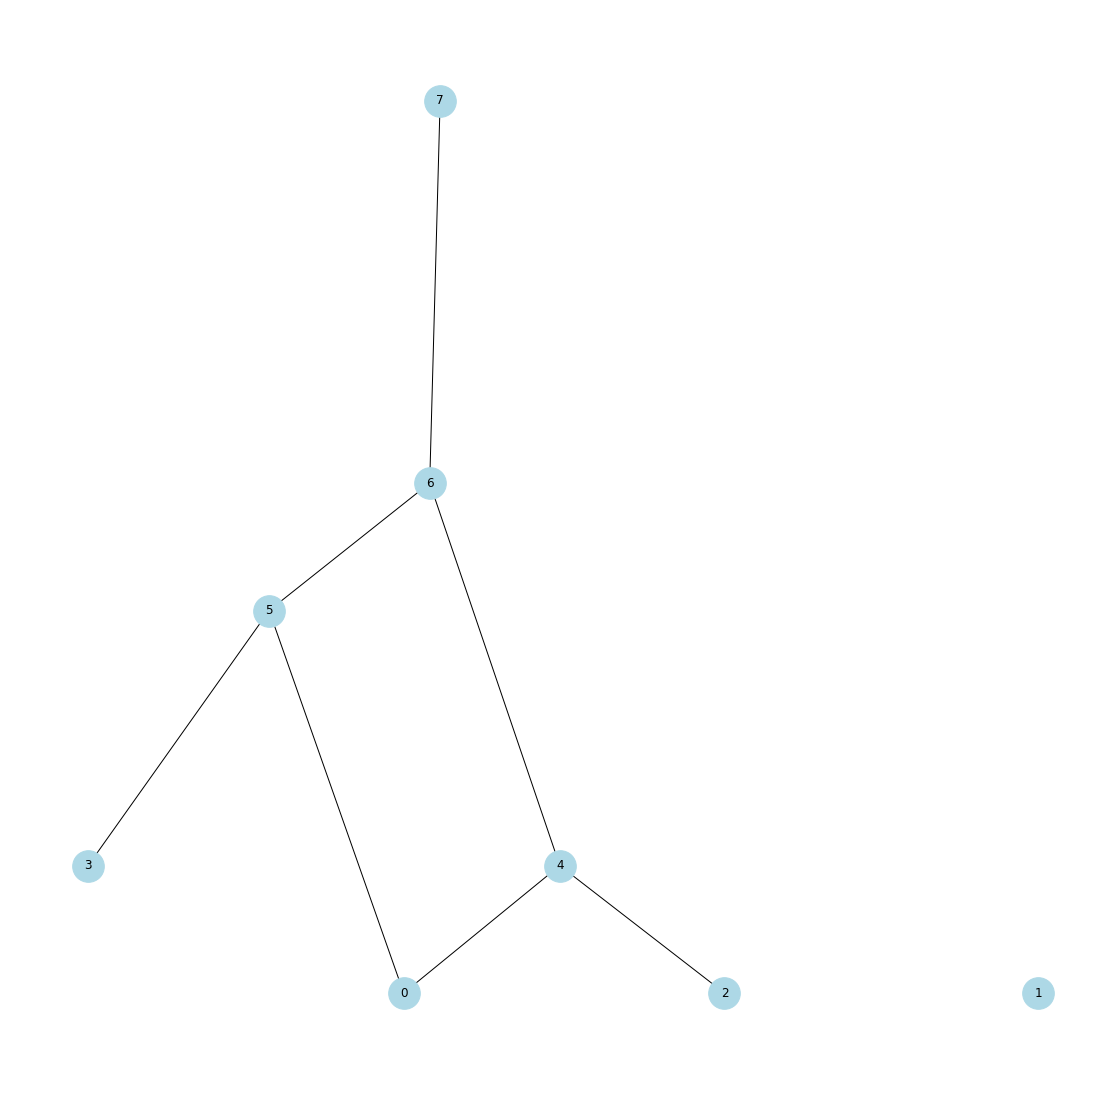

In [10]:
motifl.plot_motif_composition_graph()